### Применение непрерывного вейвлет-преобразования для поиска краев объектов на изображении

#### 1. Схемы подразделений

Пусть $s\in\mathbf{N}$ и $\mathbf{Z}^s$ -- целочисленная решетка. Схема подразделения определяется заданной последовательностью $a=\{a_{\alpha}\}_{\alpha\in\mathbf{Z}^s}$. Мы будем предполагать, что $\mathrm{supp} (a) =\{\alpha: a_{\alpha}\ne 0\}$ -- конечное множество. Обозначим $l_{\infty}(\mathbf{Z}^s)$ линейное нормированное пространство ограниченных последовательностей $\lambda=\{\lambda_{\alpha}\}_{\alpha\in\mathbf{Z}^s}$, в котором норма определяется равенством
$$
\|\lambda\|_{\infty} = \sup\limits_{\alpha\in\mathbf{Z}^s} |\lambda_{\alpha}|.
$$
Введем в рассмотрение оператор $\mathrm{S}~:~l_{\infty}(\mathbf{Z}^s)\to l_{\infty}(\mathbf{Z}^s)$, который определим формулой \[1\]
$$
(\mathrm{S}\lambda)_{\alpha}=\sum\limits_{\beta\in\mathbf{Z}^s} a_{\alpha-2\beta}\lambda_{\beta},~\lambda\in l_{\infty}(\mathbf{Z}^s).
$$

**Определение 1.** Будем говорить, что схема подразделения \[1\]
$$
\lambda^m=\mathrm{S}\lambda^{m-1},~m=1,2,\dots,~\lambda^0=\lambda
$$
сходится для $\lambda\in l_{\infty}(\mathbf{Z}^s)$, если существует непрерывная функция $f_{\lambda}$, определенная на $\mathbf{R}^s$ такая, что
$$
\lim\limits_{m\to +\infty}\left\| f_{\lambda}\left(\frac{\cdot}{2^m}\right)-\lambda^m\right\|_{\infty} = 0.
$$


Мы будем последовательность $\{a_{\alpha}\}_{\alpha\in\mathbf{Z}^s}$ называть **маской подразделения**, а $\mathrm{S}$ -- оператором подразделения \[1\].

Пусть $\alpha=\begin{pmatrix}\alpha_1&\dots &\alpha_s\end{pmatrix}^T\in\mathbf{Z}^s$. Введем в рассмотрение оператор $\mathrm{U}$, который последовательности $\lambda : \mathbf{Z}^s\to\mathbf{R}$ ставит в соответствие последовательность $\mathrm{U}\lambda :\mathbf{Z}^{s}\to \mathbf{R}$, определенную правилом: $(\mathrm{U}\lambda)_{\alpha}=\lambda_{2^{-1}\alpha}$, если все $\alpha_i$ четные и $(\mathrm{U}\lambda)_{\alpha} = 0$, если хотя бы одно из чисел $\alpha_i$ является нечетным. Тогда 
$$
(S\lambda)_{\alpha}=\sum\limits_{\beta\in\mathbf{Z}^s} a_{\alpha-2\beta}\lambda_{\beta} = \sum\limits_{\beta\in\mathbf{Z}^s} a_{\alpha-\beta}(\mathrm{U}\lambda)_{\beta} = (a*(\mathrm{U}\lambda))_{\alpha}.
$$
Из определения 1 следует, что $f_{\lambda}(2^{-m}\alpha)\approx \lambda_{\alpha}^m$,  где $\alpha\in\mathbf{Z}^s$. Поэтому  получаем следующий алгоритм приближенного нахождения значений предельной функции в узлах сетки $2^{-m}\mathbf{Z}^s$

#### 2. Поиск краев объектов на изображении

**Определение 2.**  Под вейвлетом мы будем понимать функцию $\psi \in \mathrm{L}_{1} ({\bf R}^2)\cap\mathrm{L}_{2} ({\bf R}^2)$, удовлетворяющую условию $\int\limits_{\mathbf{R}^2}\psi (\mathrm{x})d\mathrm{x} =0$.

**Определение 3.**  Для функции двух переменных $f(x,y)$ непрерывное вейвлет-преобразование этой функции определим равенством \[2\]
$$
W_s f(x,y) = \iint\limits_{\mathbf{R}^2} f(x-u,y-v)\psi_s(u,v)dudv,~~i=1,2,
$$
где $\psi_s(u,v) = \frac{1}{s^2}\psi\left(\frac{u}{s},\frac{v}{s}\right)$, $i=1,2$.

Мы будем рассматривать специальный класс вейвлет-функций \[2\]
$$
\psi^1(u,v)=\psi(\sqrt{u^2+v^2})\cos\theta,~~\psi^2(u,v)=\psi(\sqrt{u^2+v^2})\sin\theta,
$$
где $\theta$ -- полярный угол точки $(u,v)$, а носитель функции $\psi\in \mathrm{L}_1(\mathbf{R})\cap\mathrm{L}_2(\mathbf{R})$ будем предполагать компактным, содержащемся в $[0;+\infty)$. В этом случае
$$
\iint\limits_{\mathbf{R}^2} \psi^i(u,v)dudv = \int\limits_0^{+\infty} r\psi(r)dr\int\limits_0^{2\pi} k_i(\theta)d\theta = 0,
$$
где $k_1(\theta)=\cos\theta$, $k_2(\theta)=\sin\theta$. Таким образом, обе функции являются вейвлетами.

Пусть
$$
W_s^if(x,y) = \iint\limits_{\mathbf{R}^2} f(x-u,y-v)\psi_s^i(u,v)dudv,~~i=1,2.
$$

#### 2.1. Вычисление $W_sf$

Заметим, что
$$
W_sf(n,m) = \iint\limits_{\mathbf{R}^2} f(u,v) \psi_s(n-u, m-v)dudv = \sum\limits_{k,l}f(k,l) \iint\limits_{[k;k+1]\times[l,l+1]} \psi_s(n-u,m-v)dudv =
$$
$$
=\sum\limits_{k,l}f(k,l) \iint\limits_{[n-k-1;n-k]\times[m-l-1,m-l]} \psi_s(u,v)dudv = \sum\limits_{k,l}f(n-k,m-l) \psi_{k,l}^s,
$$
где
$$
\psi_{k,l}^s = \iint\limits_{[k-1;k]\times[l-1,l]} \psi_s(u,v)dudv\approx \frac{1}{r^2} \sum\limits_{i_1=0}^{r-1}\sum\limits_{i_2=0}^{r-1} \psi_s\left(k-1+\frac{2i_1+1}{2r},l-1+\frac{2i_2+1}{2r}\right),~~r\in\mathbf{N}.
$$

#### 2.2. Алгоритм определения края

**Дано:** Изображение $f$ и порог $R>1$, близкий к 1. Значения $s_1>s_2>\dots>s_J$. Порог $T$.

1. Для $j=1,2,\dots, J$ находим $W_{s_j} f$.

2. Находим точки, для которых $|\nabla W_{s_j}f(x,y)|\geqslant T$, $j=1,2,\dots, J$.

3. Среди найденных на предыдущем шаге точек оставляем те (точки края), которые удовлетворяют условию
$$
\frac{1}{R}\leqslant \frac{|\nabla W_{s_j} f(x,y)|}{|\nabla W_{s_l} f(x,y)|}\leqslant R,~~j,l=1,2,\dots, J.
$$

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmath
from scipy import signal
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)


In [6]:
def Mask(omega):
    ''' Маска схемы подразделения '''
    b = np.zeros(4)
    b[0] = 1./ 6. + omega
    b[1] = 5./ 6. - omega
    b[2] = 5./ 6. - omega
    b[3] = 1./ 6. + omega
    a = pd.Series(b, index = (-1, 0, 1, 2))
    return a

In [7]:
def psi(x, Lambda, X):
    ''' Функция $\psi(x)$, значения которой находятся с помощью кусочно-линейной интерполяции функции,
        заданной таблицей $(\lambda_i, x_i)$, которая найдена с помощью схемы подразделения.
        Итак, $\psi(x_i) = \lambda_i, \forall i$.
        X = (x_i)_i, Lambda = (\lambda_i)_i.
    '''
    y = np.interp(x, X, Lambda)
    return y

def psi_1(u, v, Lambda, X):
    ''' Функция \psi^1(u, v)'''
    y = psi(np.sqrt(u**2 + v**2), Lambda, X) * np.cos(np.arctan2(v, u))
    return y

def psi_s_1(u, v, Lambda, X, s):
    y = (1 / (s ** 2)) * psi_1(u / s, v / s, Lambda, X)
    return y

def psi_2(u, v, Lambda, X):
    ''' Функция \psi^2(u, v)'''
    y = psi(np.sqrt(u**2 + v**2), Lambda, X) * np.sin(np.arctan2(v, u))
    return y

def psi_s_2(u, v, Lambda, X, s):
    y = (1 / (s ** 2)) * psi_2(u / s, v / s, Lambda, X)
    return y

#### Построение функции с компактным носителем, содержащемся в $(0;+\infty)$

Пусть $\lambda_{0,\alpha} = \{\delta_{\alpha,k}\}_{k\in\mathbf{Z}}$  и $\psi_{\alpha}$ -- функция, полученная по схеме подразделения, с маской $a=\{a_k\}_{k\in\mathbf{Z}}$, причем $\mathrm{supp} a=[\Gamma;\Delta ]\cap \mathbf{Z}$ . Тогда

$$
\mathrm{supp}~\lambda_{J,\alpha}\subset \left[2^J \alpha + (2^J-1)\cdot\Gamma; 2^J \alpha + (2^J - 1)\cdot \Delta\right].
$$
Отсюда и из приближенного равенства $\psi_{\alpha}(2^{-J}k)\approx \lambda_{J,k}$ следует, что $\mathrm{supp} \psi_{\alpha} \subset \left[\alpha+\Gamma; \alpha+\Delta\right]$.

In [8]:
def Subdivision(m, a):
    ''' Схема стационарного подразделения с маской a '''
    supp_a = np.array(a.index)
    t = -np.min(supp_a)
    Lambda = pd.Series(0, index = np.arange(t + np.min(supp_a) - len(supp_a) - 1,
                                            t + np.max(supp_a) + len(supp_a) + 2, 1))
    X = Lambda.index
    Lambda.loc[2 * t] = 1 # Здесь уже применен оператор U. После свертки получим \lambda_1
    Lambda = Lambda.values
    a = a.values
    j = 1
    Lambda = signal.convolve(Lambda, a, mode='same')
    T = Lambda
    for s in range(1, m + 1, 1):
        Lambda = np.zeros(2 * T.shape[0])
        Lambda[::2] = T[:]
        I = np.zeros(2 * len(X))
        I[::2] = 2 * X[:]
        I[1::2] = I[::2] + 1
        X = I
        T = signal.convolve(Lambda, a, mode='same')
        j += 1
    Lambda = T[:]
    r = np.nonzero(np.abs(Lambda) > 0)
    i0 = np.max([0, np.min(r[0]) - 1])
    i1 = np.min([len(Lambda) - 1, np.max(r[0]) + 1])
    Lambda = Lambda[i0:(i1 + 1)]
    X = X[i0:(i1 + 1)]
    return [Lambda, (X / pow(2, j))]

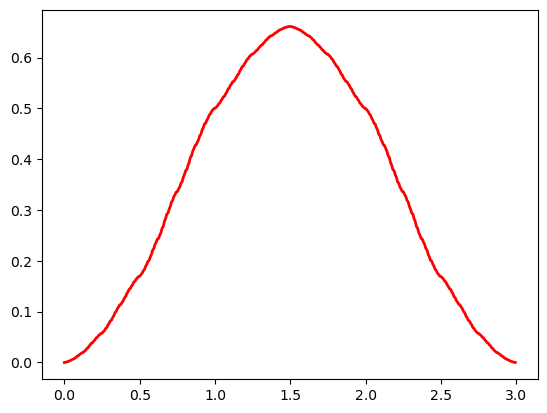

In [9]:
m = 6
N = 30
i = 6
omega = (-1. / 6.) + ((2 * i + N) / (4 * (N + 1)))
a = Mask(omega)
Lambda, X = Subdivision(m, a)
fig = plt.figure()
plt.plot(X, Lambda, '-r', linewidth = 2)

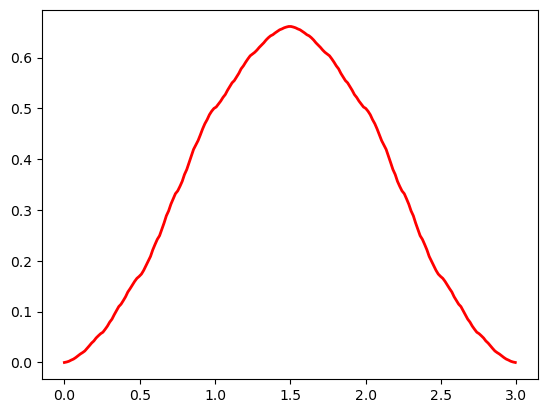

In [10]:
x_min = np.min(X)
x_max = np.max(X)
N = 200
h = 1. / (N - 1)
XL = x_min + (x_max - x_min) * np.arange(N) / (N - 1)
YL = np.zeros(XL.shape)
for i in range(N):
    YL[i] = psi(XL[i], Lambda, X)
fig = plt.figure()
plt.plot(XL, YL, '-r', linewidth = 2)

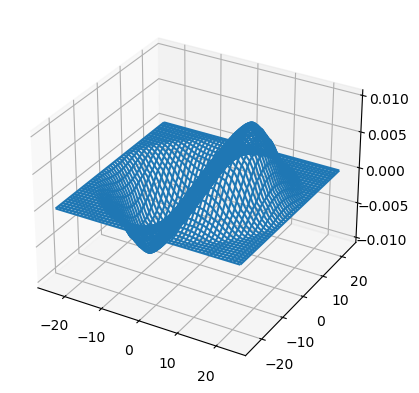

In [11]:
U = np.zeros((N, N))
V = np.zeros((N, N))
Z = np.zeros((N, N))
s = 8
for i in range(N):
    for k in range(N):
        U[i, k] = -x_max * s + 2 * x_max * s * i / (N - 1)
        V[i, k] = -x_max * s + 2 * x_max * s * k / (N - 1)
        Z[i, k] = psi_s_1(U[i, k], V[i, k], Lambda, X, s)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(U, V, Z, cmap='viridis')

plt.show()

Делаем фильтры, находим интеграл с помощью метода прямоугольников

In [13]:
s = 2
r = 10
k_max = np.int(np.fix(x_max * s) + 1)
filter_psi_s_1_2 = pd.DataFrame(0, index=range(-k_max, k_max + 1, 1), columns=range(-k_max, k_max + 1, 1))
filter_psi_s_2_2 = pd.DataFrame(0, index=range(-k_max, k_max + 1, 1), columns=range(-k_max, k_max + 1, 1))
for k in range(-k_max, k_max + 1):
    for l in range(-k_max, k_max + 1):
        psi_s_1_sum = 0
        psi_s_2_sum = 0
        for i_1 in range(r):
            for i_2 in range(r):
                u = k - 1 + (2 * i_1 + 1) / (2 * r)
                v = l - 1 + (2 * i_2 + 1) / (2 * r)
                psi_s_1_sum += psi_s_1(k, l, Lambda, X, s)
                psi_s_2_sum += psi_s_2(k, l, Lambda, X, s)

        filter_psi_s_1_2.loc[k, l] = psi_s_1_sum / r**2
        filter_psi_s_2_2.loc[k, l] = psi_s_2_sum / r**2

In [14]:
s = 4
k_max = np.int(np.fix(x_max * s) + 1)

filter_psi_s_1_4 = pd.DataFrame(0, index=range(-k_max, k_max + 1, 1), columns=range(-k_max, k_max + 1, 1))
filter_psi_s_2_4 = pd.DataFrame(0, index=range(-k_max, k_max + 1, 1), columns=range(-k_max, k_max + 1, 1))

for k in range(-k_max, k_max + 1):
    for l in range(-k_max, k_max + 1):
        psi_s_1_sum = 0
        psi_s_2_sum = 0
        for i_1 in range(r):
            for i_2 in range(r):
                psi_s_1_sum += psi_s_1(k, l, Lambda, X, s)
                psi_s_2_sum += psi_s_2(k, l, Lambda, X, s)

        filter_psi_s_1_4.loc[k, l] = psi_s_1_sum / r**2
        filter_psi_s_2_4.loc[k, l] = psi_s_2_sum / r**2



In [15]:
s = 8
k_max = np.int(np.fix(x_max * s) + 1)
filter_psi_s_1_8 = pd.DataFrame(0, index = range(-k_max, k_max + 1, 1), columns = range(-k_max, k_max + 1, 1))
filter_psi_s_2_8 = pd.DataFrame(0, index = range(-k_max, k_max + 1, 1), columns = range(-k_max, k_max + 1, 1))
for k in range(-k_max, k_max + 1):
    for l in range(-k_max, k_max + 1):
        psi_s_1_sum = 0
        psi_s_2_sum = 0
        for i_1 in range(r):
            for i_2 in range(r):
                psi_s_1_sum += psi_s_1(k, l, Lambda, X, s)
                psi_s_2_sum += psi_s_2(k, l, Lambda, X, s)

        filter_psi_s_1_8.loc[k, l] = psi_s_1_sum / r**2
        filter_psi_s_2_8.loc[k, l] = psi_s_2_sum / r**2
        

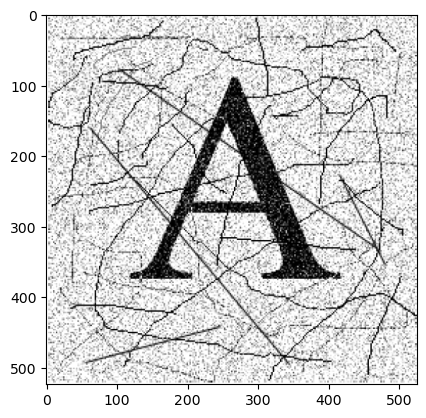

In [16]:
f = np.array(Image.open('DetectEdge\A.PNG').convert('L'))
fig = plt.figure()
plt.imshow(f, cmap='gray')  
fig.savefig('ExA.eps')


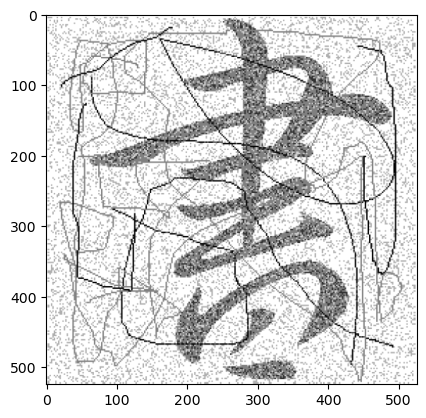

In [21]:
f = np.array(Image.open('DetectEdge\China.PNG').convert('L'))
fig = plt.figure()
plt.imshow(f, cmap='gray')  
fig.savefig('ExA.eps')


Делаем готовые свертки фильтров

In [17]:
Ws_1_2f = signal.convolve2d(f, filter_psi_s_1_2.values, mode='same', boundary='fill', fillvalue=0)
Ws_2_2f = signal.convolve2d(f, filter_psi_s_2_2.values, mode='same', boundary='fill', fillvalue=0)
Ws_1_4f = signal.convolve2d(f, filter_psi_s_1_4.values, mode='same', boundary='fill', fillvalue=0)
Ws_2_4f = signal.convolve2d(f, filter_psi_s_2_4.values, mode='same', boundary='fill', fillvalue=0)
Ws_1_8f = signal.convolve2d(f, filter_psi_s_1_8.values, mode='same', boundary='fill', fillvalue=0)
Ws_2_8f = signal.convolve2d(f, filter_psi_s_2_8.values, mode='same', boundary='fill', fillvalue=0)
#
Ms2 = np.sqrt((Ws_1_2f ** 2) + (Ws_2_2f ** 2))
Ms4 = np.sqrt((Ws_1_4f ** 2) + (Ws_2_4f ** 2))
Ms8 = np.sqrt((Ws_1_8f ** 2) + (Ws_2_8f ** 2))

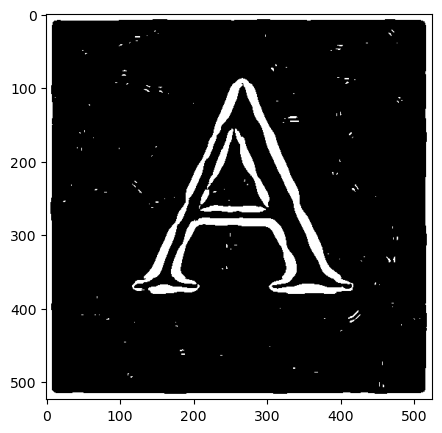

In [18]:
f = np.array(Image.open('DetectEdge\A.PNG').convert('L'))

T = np.max([np.max(Ms2), np.max(Ms4), np.max(Ms8)]) * 0.6
R = 5.7
edge_image = np.zeros_like(f)

# Значения s
s_values = [2, 4, 8]

for s in s_values:
    Ws_1 = globals()['Ws_1_' + str(s) + 'f']
    Ws_2 = globals()['Ws_2_' + str(s) + 'f']
    Ms = globals()['Ms' + str(s)]

    gradient_magnitude = np.sqrt((Ws_1 ** 2) + (Ws_2 ** 2))
    edge_points = np.where(gradient_magnitude >= T)
    for j in s_values:
        Ws_1_j = globals()['Ws_1_' + str(j) + 'f']
        Ws_2_j = globals()['Ws_2_' + str(j) + 'f']
        Ms_j = globals()['Ms' + str(j)]

        ratio_condition = np.logical_and((1 / R) <= (gradient_magnitude[edge_points] / Ms_j[edge_points]),
                                         (gradient_magnitude[edge_points] / Ms_j[edge_points]) <= R)

        edge_image[edge_points] = np.logical_or(edge_image[edge_points], ratio_condition)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(edge_image, cmap='gray')
plt.show()



In [25]:
Ws_1_2ch = signal.convolve2d(ch, filter_psi_s_1_2.values, mode='same', boundary='fill', fillvalue=0)
Ws_2_2ch = signal.convolve2d(ch, filter_psi_s_2_2.values, mode='same', boundary='fill', fillvalue=0)
Ws_1_4ch = signal.convolve2d(ch, filter_psi_s_1_4.values, mode='same', boundary='fill', fillvalue=0)
Ws_2_4ch = signal.convolve2d(ch, filter_psi_s_2_4.values, mode='same', boundary='fill', fillvalue=0)
Ws_1_8ch = signal.convolve2d(ch, filter_psi_s_1_8.values, mode='same', boundary='fill', fillvalue=0)
Ws_2_8ch = signal.convolve2d(ch, filter_psi_s_2_8.values, mode='same', boundary='fill', fillvalue=0)
#
Ms2 = np.sqrt((Ws_1_2ch ** 2) + (Ws_2_2ch ** 2))
Ms4 = np.sqrt((Ws_1_4ch ** 2) + (Ws_2_4ch ** 2))
Ms8 = np.sqrt((Ws_1_8ch ** 2) + (Ws_2_8ch ** 2))

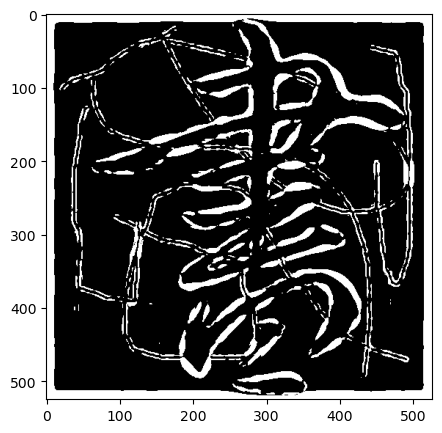

In [37]:
ch = np.array(Image.open('DetectEdge\China.PNG').convert('L'))

T = np.max([np.max(Ms2), np.max(Ms4), np.max(Ms8)]) * 0.4
R = 2
edge_image = np.zeros_like(ch)

# Значения s
s_values = [2, 4, 8]

for s in s_values:
    Ws_1 = globals()['Ws_1_' + str(s) + 'ch']
    Ws_2 = globals()['Ws_2_' + str(s) + 'ch']
    Ms = globals()['Ms' + str(s)]

    gradient_magnitude = np.sqrt((Ws_1 ** 2) + (Ws_2 ** 2))
    edge_points = np.where(gradient_magnitude >= T)
    for j in s_values:
        Ws_1_j = globals()['Ws_1_' + str(j) + 'ch']
        Ws_2_j = globals()['Ws_2_' + str(j) + 'ch']
        Ms_j = globals()['Ms' + str(j)]

        ratio_condition = np.logical_and((1 / R) <= (gradient_magnitude[edge_points] / Ms_j[edge_points]),
                                         (gradient_magnitude[edge_points] / Ms_j[edge_points]) <= R)

        edge_image[edge_points] = np.logical_or(edge_image[edge_points], ratio_condition)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(edge_image, cmap='gray')
plt.show()



Можем видеть как алгоритм хорошо справляеться с мелким шумом, но гораздно хуже с более яркими зашумлениями

### Литература

1. A. S. Cavaretta, W. Dahmen, and C. A. Micchelli, Stationary Subdivision Schemes, Mem. Amer. Math. Soc. 93, 1-186.

2. Y.Y. Tang, L.H. Yang, J. Liu, H.Ma Wavelet theory and its application to pattern recognition. World Scientific Publishing Co. Pte. Ltd. 2000, 344 pp.